# Korelacija med anksioznostjo in motivacijo

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [2]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
#
#df[['Motivacija', 'Anksioznost']] = scaler.fit_transform(df[['Motivacija', 'Anksioznost']])

In [3]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


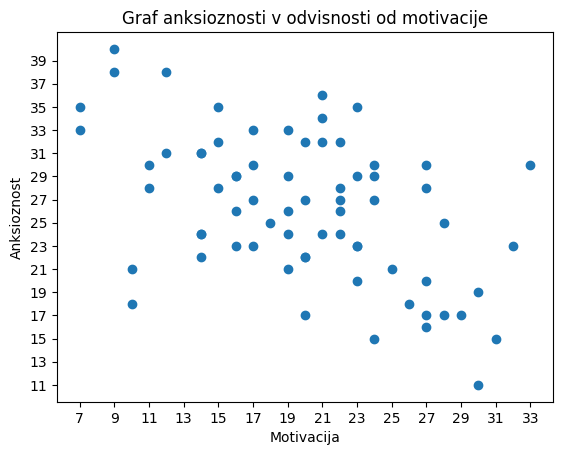

In [5]:
from matplotlib import pyplot
import numpy as np

# Assuming df is your DataFrame containing columns "Motivacija" and "Anksioznost"

min_motivacija = df["Motivacija"].min()
max_motivacija = df["Motivacija"].max()
min_anksioznost = df["Anksioznost"].min()
max_anksioznost = df["Anksioznost"].max()

pyplot.scatter(df["Motivacija"], df["Anksioznost"])
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')

pyplot.xticks(np.arange(min_motivacija, max_motivacija + 1, 2))
pyplot.yticks(np.arange(min_anksioznost, max_anksioznost + 1, 2))

pyplot.show()

In [6]:
from numpy import cov
covariance = cov(df["Motivacija"], df["Anksioznost"])
print(covariance)

[[ 39.34161491 -19.65838509]
 [-19.65838509  39.52712215]]


In [7]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(42)

In [8]:
from scipy import stats

pearson_corr, pearson_p_value = stats.pearsonr(df["Motivacija"], df["Anksioznost"])
print("Pearson correlation coefficient: %.3f" % pearson_corr)
print("P-value: %.3f" % pearson_p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = stats.spearmanr(df["Motivacija"], df["Anksioznost"])
print("Spearman correlation coefficient: %.3f" % spearman_corr)
print("P-value: %.3f" % spearman_p_value)

Pearson correlation coefficient: -0.499
P-value: 0.000
Spearman correlation coefficient: -0.456
P-value: 0.000


Test linearnosti

In [9]:
import pandas as pd
import statsmodels.formula.api as smf

# Your code for regression
fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()

# Extracting desired statistics from the summary output
summary_output = fit.summary()

# Extracting model information
model_info = summary_output.tables[0]

# Extracting detailed statistics
detailed_stats = summary_output.tables[1]

# Convert to pandas DataFrames
model_info_df = pd.DataFrame(model_info.data)
detailed_stats_df = pd.DataFrame(detailed_stats.data)

# Save each extracted information to separate CSV files
model_info_df.to_csv('model_info.csv', index=False, header=False)
detailed_stats_df.to_csv('detailed_stats.csv', index=False, header=False)

In [10]:
import statsmodels.formula.api as smf

fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     22.49
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.12e-05
Time:                        08:47:25   Log-Likelihood:                -217.35
No. Observations:                  70   AIC:                             438.7
Df Residuals:                      68   BIC:                             443.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.9158      2.831     11.629      

In [11]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.007976811576896337),
 ('p-value', 0.9288331645975823),
 ('f-value', 0.007749785797287877),
 ('f p-value', 0.9301092955516257)]

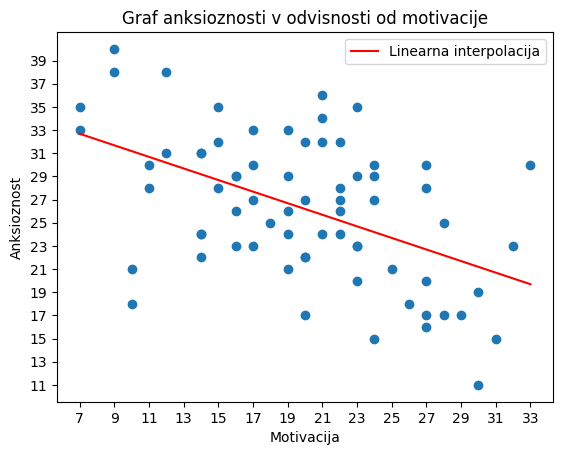

In [12]:
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame containing columns "Motivacija" and "Anksioznost"

# Scatter plot
pyplot.scatter(df["Motivacija"], df["Anksioznost"])
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')

# Calculate linear regression (OLS)
X = df[["Motivacija"]]
y = df["Anksioznost"]

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Create regression line
x_values = np.linspace(df["Motivacija"].min(), df["Motivacija"].max(), 100)
y_values = intercept + slope * x_values

# Plot regression line
pyplot.plot(x_values, y_values, color='red', label='Linearna interpolacija')

# Set ticks
pyplot.xticks(np.arange(df["Motivacija"].min(), df["Motivacija"].max() + 1, 2))
pyplot.yticks(np.arange(df["Anksioznost"].min(), df["Anksioznost"].max() + 1, 2))

# Show plot
pyplot.legend()
pyplot.show()

# Test normalnosti

Shapiro-Wilk Test Results for Motivacija:
P-value: 0.6108
The data in Motivacija looks Gaussian (fail to reject H0)


Shapiro-Wilk Test Results for Anksioznost:
P-value: 0.8150
The data in Anksioznost looks Gaussian (fail to reject H0)


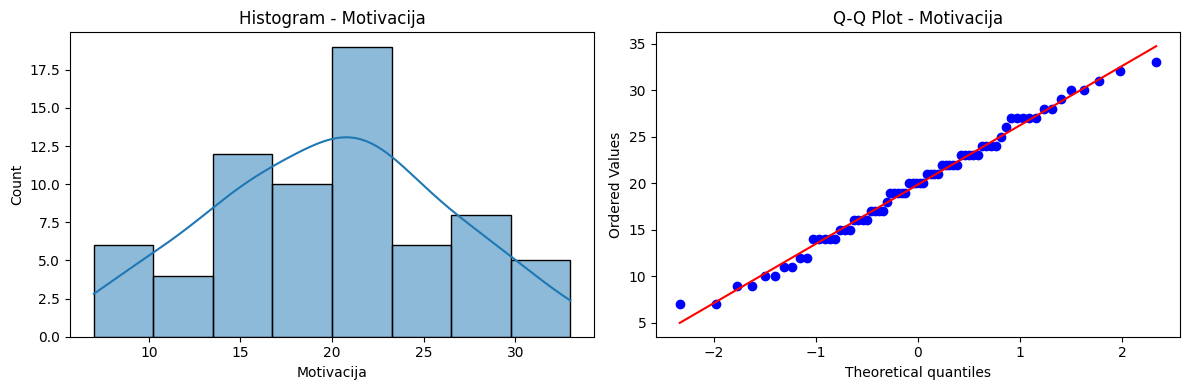

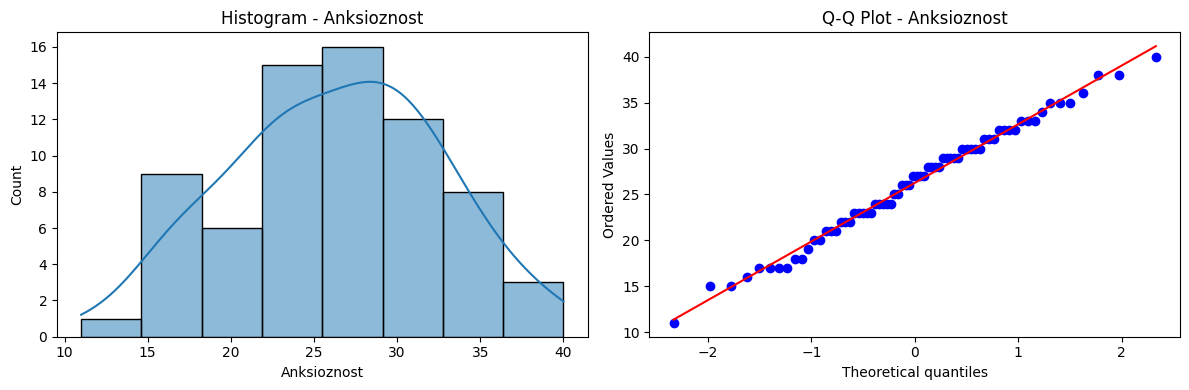

In [13]:
import numpy as np
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your file)
data = df

# Specify the columns to test for normality
column1 = "Motivacija"  # Replace 'column_name_1' with the actual column name
column2 = 'Anksioznost'  # Replace 'column_name_2' with the actual column name

# Perform Shapiro-Wilk test for column 1
statistic1, p_value1 = shapiro(data[column1])

# Perform Shapiro-Wilk test for column 2
statistic2, p_value2 = shapiro(data[column2])

# Display normality assessment
print(f"Shapiro-Wilk Test Results for {column1}:")
print(f"P-value: {p_value1:.4f}")
if p_value1 > 0.05:
    print(f"The data in {column1} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column1} does not look Gaussian (reject H0)")

print("\n")

print(f"Shapiro-Wilk Test Results for {column2}:")
print(f"P-value: {p_value2:.4f}")
if p_value2 > 0.05:
    print(f"The data in {column2} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column2} does not look Gaussian (reject H0)")

# Visual assessment of normality for column 1
plt.figure(figsize=(12, 4))

# Histogram for column 1
plt.subplot(1, 2, 1)
sns.histplot(data[column1], kde=True)
plt.title(f'Histogram - {column1}')

# Q-Q plot for column 1
plt.subplot(1, 2, 2)
probplot(data[column1], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column1}')

plt.tight_layout()
plt.show()

# Visual assessment of normality for column 2
plt.figure(figsize=(12, 4))

# Histogram for column 2
plt.subplot(1, 2, 1)
sns.histplot(data[column2], kde=True)
plt.title(f'Histogram - {column2}')

# Q-Q plot for column 2
plt.subplot(1, 2, 2)
probplot(data[column2], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column2}')

plt.tight_layout()
plt.show()

# SPOL

In [14]:
corr, _ = pearsonr(df["Motivacija"], df["Spol"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.350


### Cohen d, alpha, omega

In [15]:
from numpy import var
from math import sqrt
from numpy import mean
def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = mean(d1), mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [16]:
d = cohend(df["Motivacija"], df["Anksioznost"])
print(d)

-1.0191603718640816


In [17]:
data = df
selected_columns = ['Anksioznost', 'Motivacija']
data = data[selected_columns]

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(method='minres')

# Fit the factor analysis model to your data
fa.fit(data)

# Calculate factor loadings
loadings = fa.loadings_

# Calculate error variances (unique variances)
# Error variance = 1 - (factor loading)^2
error_variances = 1 - np.square(loadings)

# Calculate McDonald's Omega
omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))

print("McDonald's Omega:")
print(omega)


McDonald's Omega:
0.5711854617545693


In [18]:
def calculate_omega(loadings):
    error_variances = 1 - np.square(loadings)
    omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))
    return omega

# Number of bootstrap samples
num_samples = 1000
omega_values = []

# Bootstrap resampling and calculating Omega
for _ in range(num_samples):
    # Resampling with replacement
    bootstrap_indices = np.random.choice(df.index, size=len(df), replace=True)
    bootstrap_data = df.iloc[bootstrap_indices]

    # Fit FactorAnalyzer to bootstrap data
    fa.fit(bootstrap_data)
    loadings = fa.loadings_

    # Calculate Omega for the bootstrap sample
    omega = calculate_omega(loadings)
    omega_values.append(omega)

# Calculate 95% confidence interval
confidence_interval = np.percentile(omega_values, [2.5, 97.5])

print("McDonald's Omega:")
print(f"Point Estimate: {np.mean(omega_values)}")
print(f"95% Confidence Interval: {confidence_interval}")

McDonald's Omega:
Point Estimate: 0.5321956922217305
95% Confidence Interval: [0.52728853 0.53820101]


In [19]:
import pingouin as pg

pg.cronbach_alpha(data=data)

(-1.9881069536631815, array([-3.809, -0.857]))

# Anksioznost / spol

In [20]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


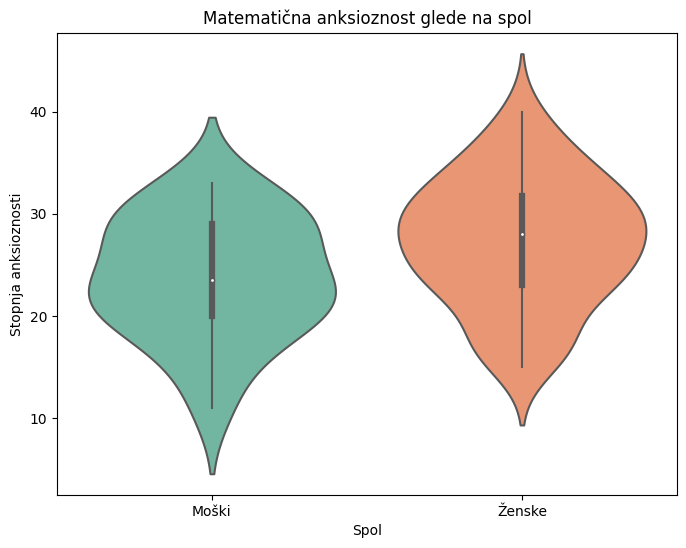

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot
"""plt.figure(figsize=(8, 6))
sns.boxplot(x='Spol', y='Anksioznost', data=df, palette='Set2')
plt.title('Anxiety Levels Across Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.xticks([0, 1], ['Male', 'Female'])  # Replace 0 and 1 with your gender labels
plt.show()"""

plt.figure(figsize=(8, 6))
sns.violinplot(x='Spol', y='Anksioznost', data=df, palette='Set2')
plt.title('Matematična anksioznost glede na spol')
plt.xlabel('Spol')
plt.ylabel('Stopnja anksioznosti')
plt.xticks([0, 1], ['Moški', 'Ženske'])  # Replace 0 and 1 with your gender labels
plt.show()

In [22]:
male_anxiety = df[df['Spol'] == 0]['Anksioznost']
female_anxiety = df[df['Spol'] == 1]['Anksioznost']

# Performing t-test
t_stat, p_value = stats.ttest_ind(male_anxiety, female_anxiety)
print(f"T-Statistic: {t_stat:.3f}\nP-Value: {p_value:.3f}")

print("")

f_stat, p_value = stats.f_oneway(male_anxiety, female_anxiety)
print(f"F-Statistic: {f_stat:.3f}\nP-Value: {p_value:.3f}")

T-Statistic: -2.166
P-Value: 0.034

F-Statistic: 4.691
P-Value: 0.034


In [23]:
mean_diff = male_anxiety.mean() - female_anxiety.mean()
pooled_std = ((len(male_anxiety) - 1) * male_anxiety.var() + (len(female_anxiety) - 1) * female_anxiety.var()) / (len(male_anxiety) + len(female_anxiety) - 2)
cohens_d = mean_diff / (pooled_std ** 0.5)
print(f"Cohen's d: {cohens_d:.3f}")

ss_between = ((male_anxiety.mean() - df['Anksioznost'].mean())**2 * len(male_anxiety) + (female_anxiety.mean() - df['Anksioznost'].mean())**2 * len(female_anxiety)) / (len(data) - 1)
ss_total = ((male_anxiety - df['Anksioznost'].mean())**2).sum() + ((female_anxiety - df['Anksioznost'].mean())**2).sum()
eta_squared = ss_between / ss_total
print(f"Eta-squared: {eta_squared:.3f}")

Cohen's d: -0.573
Eta-squared: 0.001
